# **Data Exploration**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
netflix = pd.read_csv('netflix_3k.csv')

In [3]:
netflix.head()

,Unnamed: 0,author_id,statuses_count,location,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,lang,retweet_count,hashtags,favorite_count
0,0,727163823648587778,3710,NaN,False,136,267,7,152,1628907318296432640,#Sheetmusic '#Wednesday Main Titles' for #Cell...,2023-02-23 23:59:02,en,2,"[{'text': 'Sheetmusic', 'indices': [0, 11]}, {...",1
1,1,1329551129240346626,438,NaN,False,14,140,0,200,1628907032584626182,[Shaiya] Luffy The Emperor : Plans For World C...,2023-02-23 23:57:54,en,0,"[{'text': 'Shaiya', 'indices': [65, 72]}, {'te...",0
2,2,2789469546,6682,"Vancouver, British Columbia",False,505,1318,1,7410,1628906917941608448,BANG FOR BUCK PEOPLE.\n\nApple + has impressed...,2023-02-23 23:57:27,en,0,"[{'text': 'Netflix', 'indices': [128, 136]}]",0
3,3,61900277,22888,Sweden,False,362,2650,6,44157,1628906620099915776,6 episodes done ✔️ the rest tomorrow.\nAm I th...,2023-02-23 23:56:16,en,0,"[{'text': 'OuterBanks', 'indices': [127, 138]}...",1
4,4,1119447958091644928,3869,NaN,False,167,138,4,52,1628906539649056768,Netflix's 'Outer Banks' Season 3 is now stream...,2023-02-23 23:55:57,en,0,"[{'text': 'OuterBanks', 'indices': [51, 62]}, ...",0


In [4]:
netflix.describe()

,Unnamed: 0,author_id,statuses_count,followers_count,friends_count,listed_count,favourites_count,tweet_id,retweet_count,favorite_count
count,2649.000000,2.649000e+03,2.649000e+03,2.649000e+03,2649.000000,2649.000000,2649.000000,2.649000e+03,2649.000000,2649.000000
mean,456.502831,7.702456e+17,3.156412e+04,1.936863e+04,1293.631182,142.506606,13445.956965,1.629861e+18,1.658362,8.375236
std,277.925531,6.906472e+17,1.153447e+05,3.369475e+05,7847.578198,2735.379003,36594.706744,1.062366e+15,19.858352,97.006686
min,0.000000,4.797300e+04,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.628666e+18,0.000000,0.000000
25%,220.000000,3.297686e+08,1.140000e+03,6.600000e+01,89.000000,0.000000,144.000000,1.628836e+18,0.000000,0.000000
50%,441.000000,9.794200e+17,5.783000e+03,3.070000e+02,333.000000,2.000000,1313.000000,1.629772e+18,0.000000,0.000000
75%,668.000000,1.458059e+18,2.200700e+04,1.206000e+03,1032.000000,14.000000,9340.000000,1.629989e+18,0.000000,2.000000
max,999.000000,1.631428e+18,2.289406e+06,1.029436e+07,310445.000000,107486.000000,587003.000000,1.631664e+18,788.000000,2969.000000


In [5]:
print('The unique number of users analysed is:',len(netflix['author_id'].unique()))

The unique number of users analysed is: 1891


In [6]:
netflix = netflix.drop('Unnamed: 0', axis=1)

# **Data Preprocessing**

In [7]:
import re

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [8]:
netflix['text'] = netflix['text'].apply(preprocess_text)
netflix

,author_id,statuses_count,location,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,lang,retweet_count,hashtags,favorite_count
0,727163823648587778,3710,NaN,False,136,267,7,152,1628907318296432640,main titles for amp available on and,2023-02-23 23:59:02,en,2,"[{'text': 'Sheetmusic', 'indices': [0, 11]}, {...",1
1,1329551129240346626,438,NaN,False,14,140,0,200,1628907032584626182,shaiya luffy the emperor plans for world chang...,2023-02-23 23:57:54,en,0,"[{'text': 'Shaiya', 'indices': [65, 72]}, {'te...",0
2,2789469546,6682,"Vancouver, British Columbia",False,505,1318,1,7410,1628906917941608448,bang for buck people apple has impressed me wi...,2023-02-23 23:57:27,en,0,"[{'text': 'Netflix', 'indices': [128, 136]}]",0
3,61900277,22888,Sweden,False,362,2650,6,44157,1628906620099915776,6 episodes done the rest tomorrow am i the onl...,2023-02-23 23:56:16,en,0,"[{'text': 'OuterBanks', 'indices': [127, 138]}...",1
4,1119447958091644928,3869,NaN,False,167,138,4,52,1628906539649056768,netflixs outer banks season 3 is now streaming,2023-02-23 23:55:57,en,0,"[{'text': 'OuterBanks', 'indices': [51, 62]}, ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,979420009352105985,7291,Italy,False,88,446,0,54,1631425317632876544,il film bullet train in streaming su amazon pr...,2023-03-02 22:44:40,en,0,"[{'text': 'Netflix', 'indices': [86, 94]}, {'t...",0
2645,1606751894738796550,42,NaN,False,14,335,0,105,1631425292714536964,just finished outer banks 3,2023-03-02 22:44:34,en,0,"[{'text': 'OBX', 'indices': [31, 35]}, {'text'...",0
2646,1562461403927445504,136,NaN,False,94,538,0,1215,1631425153996406784,knock it off with the bs race card these 2 lia...,2023-03-02 22:44:01,en,0,"[{'text': 'WAAGH', 'indices': [221, 227]}, {'t...",5
2647,1628427313338626050,19,NaN,False,1,29,0,15,1631425051357577216,the second season is on fire,2023-03-02 22:43:37,en,0,"[{'text': 'Netflix', 'indices': [67, 75]}, {'t...",0


In [9]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# Tokenize text column and store in a new column called tokens
netflix['tokens'] = netflix['text'].apply(lambda x: word_tokenize(x))
netflix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,author_id,statuses_count,location,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,lang,retweet_count,hashtags,favorite_count,tokens
0,727163823648587778,3710,NaN,False,136,267,7,152,1628907318296432640,main titles for amp available on and,2023-02-23 23:59:02,en,2,"[{'text': 'Sheetmusic', 'indices': [0, 11]}, {...",1,"[main, titles, for, amp, available, on, and]"
1,1329551129240346626,438,NaN,False,14,140,0,200,1628907032584626182,shaiya luffy the emperor plans for world chang...,2023-02-23 23:57:54,en,0,"[{'text': 'Shaiya', 'indices': [65, 72]}, {'te...",0,"[shaiya, luffy, the, emperor, plans, for, worl..."
2,2789469546,6682,"Vancouver, British Columbia",False,505,1318,1,7410,1628906917941608448,bang for buck people apple has impressed me wi...,2023-02-23 23:57:27,en,0,"[{'text': 'Netflix', 'indices': [128, 136]}]",0,"[bang, for, buck, people, apple, has, impresse..."
3,61900277,22888,Sweden,False,362,2650,6,44157,1628906620099915776,6 episodes done the rest tomorrow am i the onl...,2023-02-23 23:56:16,en,0,"[{'text': 'OuterBanks', 'indices': [127, 138]}...",1,"[6, episodes, done, the, rest, tomorrow, am, i..."
4,1119447958091644928,3869,NaN,False,167,138,4,52,1628906539649056768,netflixs outer banks season 3 is now streaming,2023-02-23 23:55:57,en,0,"[{'text': 'OuterBanks', 'indices': [51, 62]}, ...",0,"[netflixs, outer, banks, season, 3, is, now, s..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,979420009352105985,7291,Italy,False,88,446,0,54,1631425317632876544,il film bullet train in streaming su amazon pr...,2023-03-02 22:44:40,en,0,"[{'text': 'Netflix', 'indices': [86, 94]}, {'t...",0,"[il, film, bullet, train, in, streaming, su, a..."
2645,1606751894738796550,42,NaN,False,14,335,0,105,1631425292714536964,just finished outer banks 3,2023-03-02 22:44:34,en,0,"[{'text': 'OBX', 'indices': [31, 35]}, {'text'...",0,"[just, finished, outer, banks, 3]"
2646,1562461403927445504,136,NaN,False,94,538,0,1215,1631425153996406784,knock it off with the bs race card these 2 lia...,2023-03-02 22:44:01,en,0,"[{'text': 'WAAGH', 'indices': [221, 227]}, {'t...",5,"[knock, it, off, with, the, bs, race, card, th..."
2647,1628427313338626050,19,NaN,False,1,29,0,15,1631425051357577216,the second season is on fire,2023-03-02 22:43:37,en,0,"[{'text': 'Netflix', 'indices': [67, 75]}, {'t...",0,"[the, second, season, is, on, fire]"


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [10]:
# Remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Store the output as filtered_tokens
filtered_tokens = []
for tokens in netflix['tokens']:
    filtered_tokens.append([token.lower() for token in tokens if token.lower() not in stop_words])
    
netflix['filtered_tokens'] = filtered_tokens
netflix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,author_id,statuses_count,location,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,lang,retweet_count,hashtags,favorite_count,tokens,filtered_tokens
0,727163823648587778,3710,NaN,False,136,267,7,152,1628907318296432640,main titles for amp available on and,2023-02-23 23:59:02,en,2,"[{'text': 'Sheetmusic', 'indices': [0, 11]}, {...",1,"[main, titles, for, amp, available, on, and]","[main, titles, amp, available]"
1,1329551129240346626,438,NaN,False,14,140,0,200,1628907032584626182,shaiya luffy the emperor plans for world chang...,2023-02-23 23:57:54,en,0,"[{'text': 'Shaiya', 'indices': [65, 72]}, {'te...",0,"[shaiya, luffy, the, emperor, plans, for, worl...","[shaiya, luffy, emperor, plans, world, change,..."
2,2789469546,6682,"Vancouver, British Columbia",False,505,1318,1,7410,1628906917941608448,bang for buck people apple has impressed me wi...,2023-02-23 23:57:27,en,0,"[{'text': 'Netflix', 'indices': [128, 136]}]",0,"[bang, for, buck, people, apple, has, impresse...","[bang, buck, people, apple, impressed, quality..."
3,61900277,22888,Sweden,False,362,2650,6,44157,1628906620099915776,6 episodes done the rest tomorrow am i the onl...,2023-02-23 23:56:16,en,0,"[{'text': 'OuterBanks', 'indices': [127, 138]}...",1,"[6, episodes, done, the, rest, tomorrow, am, i...","[6, episodes, done, rest, tomorrow, one, hard,..."
4,1119447958091644928,3869,NaN,False,167,138,4,52,1628906539649056768,netflixs outer banks season 3 is now streaming,2023-02-23 23:55:57,en,0,"[{'text': 'OuterBanks', 'indices': [51, 62]}, ...",0,"[netflixs, outer, banks, season, 3, is, now, s...","[netflixs, outer, banks, season, 3, streaming]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,979420009352105985,7291,Italy,False,88,446,0,54,1631425317632876544,il film bullet train in streaming su amazon pr...,2023-03-02 22:44:40,en,0,"[{'text': 'Netflix', 'indices': [86, 94]}, {'t...",0,"[il, film, bullet, train, in, streaming, su, a...","[il, film, bullet, train, streaming, su, amazo..."
2645,1606751894738796550,42,NaN,False,14,335,0,105,1631425292714536964,just finished outer banks 3,2023-03-02 22:44:34,en,0,"[{'text': 'OBX', 'indices': [31, 35]}, {'text'...",0,"[just, finished, outer, banks, 3]","[finished, outer, banks, 3]"
2646,1562461403927445504,136,NaN,False,94,538,0,1215,1631425153996406784,knock it off with the bs race card these 2 lia...,2023-03-02 22:44:01,en,0,"[{'text': 'WAAGH', 'indices': [221, 227]}, {'t...",5,"[knock, it, off, with, the, bs, race, card, th...","[knock, bs, race, card, 2, liars, took, lie, b..."
2647,1628427313338626050,19,NaN,False,1,29,0,15,1631425051357577216,the second season is on fire,2023-03-02 22:43:37,en,0,"[{'text': 'Netflix', 'indices': [67, 75]}, {'t...",0,"[the, second, season, is, on, fire]","[second, season, fire]"


# **Word Cloud**

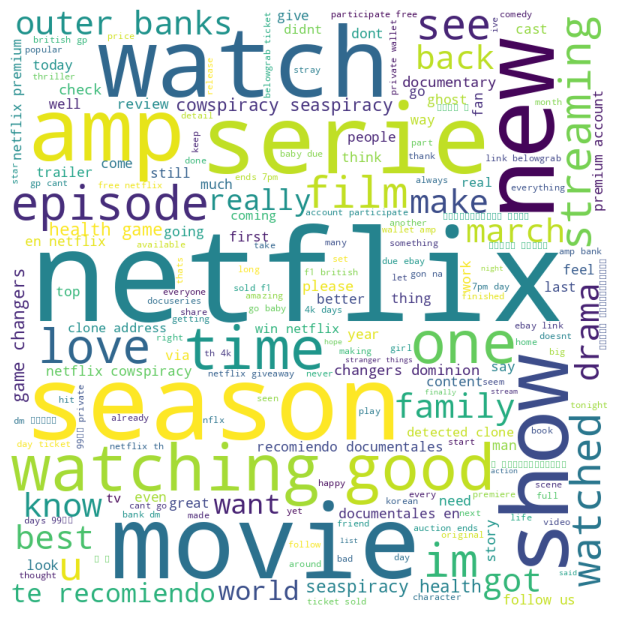

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Plot a word cloud
cloud = ' '.join([' '.join(tokens) for tokens in netflix['filtered_tokens']])

wordcloud = WordCloud(width=800, height=800, background_color='white').generate(cloud)

plt.figure(figsize=(6,6), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

# **Time Series Analysis**

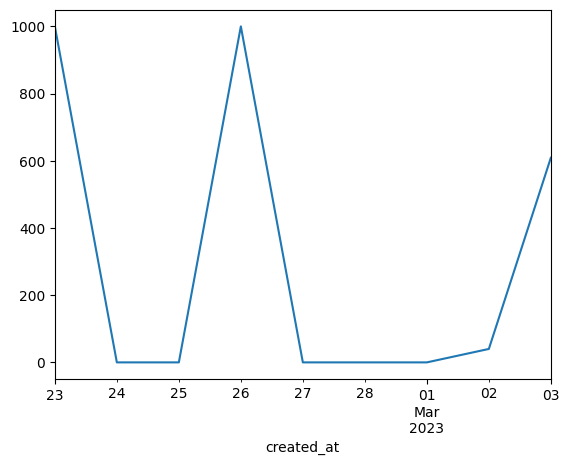

In [12]:
# Convert date column to datetime and set as index
netflix['created_at'] = pd.to_datetime(netflix['created_at'])
netflix = netflix.set_index('created_at')

# Resample data to daily frequency and count the number of tweets per day
daily_tweets = netflix['text'].resample('D').count()

# Plot the number of tweets over time
daily_tweets.plot()
plt.show()

In [13]:
filtered_tweets = netflix.loc['2023-02-26']
filtered_tweets

,author_id,statuses_count,location,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,lang,retweet_count,hashtags,favorite_count,tokens,filtered_tokens
created_at,,,,,,,,,,,,,,,,
2023-02-26 23:59:50,21618697,23089,"Los Angeles, CA",True,74064,1618,395,49562,1629994679654813698,its been awhile how about a sunday afternoon q...,en,16,"[{'text': 'CobraKai', 'indices': [59, 68]}, {'...",240,"[its, been, awhile, how, about, a, sunday, aft...","[awhile, sunday, afternoon, q, amp]"
2023-02-26 23:56:10,1249055003718717440,241,NaN,False,51,134,1,60,1629993759244161025,still celebrating because todays movie is as u...,en,0,"[{'text': 'BLACKHISTORYMONTH', 'indices': [18,...",0,"[still, celebrating, because, todays, movie, i...","[still, celebrating, todays, movie, usual, cli..."
2023-02-26 23:53:30,1598160257871937537,846,NaN,False,138,54,0,2877,1629993089342533633,zoom zoom zoom to the moon moon moon,en,5,"[{'text': 'henrydanger', 'indices': [42, 54]},...",9,"[zoom, zoom, zoom, to, the, moon, moon, moon]","[zoom, zoom, zoom, moon, moon, moon]"
2023-02-26 23:52:10,1598451437297598464,196,"New York, USA",False,4,209,0,654,1629992753416351747,its been several years amp im still sad s girl...,en,0,"[{'text': 'Netflix', 'indices': [44, 52]}, {'t...",0,"[its, been, several, years, amp, im, still, sa...","[several, years, amp, im, still, sad, girlboss..."
2023-02-26 23:50:20,408831280,462,NaN,False,3,91,0,5355,1629992290105131008,drive to survive has lost whatever credibility...,en,0,"[{'text': 'netflix', 'indices': [77, 85]}, {'t...",1,"[drive, to, survive, has, lost, whatever, cred...","[drive, survive, lost, whatever, credibility, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-26 02:05:03,189680845,10019,"Exit 9, Nj",False,70,133,11,10199,1629663806967119874,idgaf if it was 3hrs 5min longthis was one of ...,en,2,"[{'text': 'Netflix', 'indices': [105, 113]}, {...",20,"[idgaf, if, it, was, 3hrs, 5min, longthis, was...","[idgaf, 3hrs, 5min, longthis, one, dopest, fil..."
2023-02-26 02:04:27,24740382,96334,"Washington, DC",False,631,319,10,31909,1629663655322169344,is ganging this season amp im only on ep 2,en,0,"[{'text': 'Ganglands', 'indices': [0, 10]}, {'...",0,"[is, ganging, this, season, amp, im, only, on,...","[ganging, season, amp, im, ep, 2]"
2023-02-26 02:03:14,1101199325772816385,287,NaN,False,50,319,0,1172,1629663346562674691,even though its weird to see different teens i...,en,0,"[{'text': 'tv', 'indices': [172, 175]}, {'text...",0,"[even, though, its, weird, to, see, different,...","[even, though, weird, see, different, teens, h..."


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

no_topics = 10
no_features = 1000

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=1, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(filtered_tweets['text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

nmf_model = NMF(n_components=no_topics, random_state=42)
nmf_model.fit(tfidf)


for idx, topic in enumerate(nmf_model.components_):
    print(f"Topic #{idx}")
    print([tfidf_feature_names[i] for i in topic.argsort()[-10:]]) # prints top 10 features in each topic
    print("\n")


Topic #0
['gp', 'f1', 'auction', 'ebay', '7pm', 'british', 'baby', 'belowgrab', 'day', 'ticket']


Topic #1
['drama', 'premium', 'just', 'account', 'free', '20', 'win', 'participate', 'giveaway', 'netflix']


Topic #2
['vt', 'url', 'ip', 'possible', 'hxxpsstayreviewcomdhtaitnetfiixtainloginphp', 'hxxpsnetflixu32989dvdradisolorgenloginphp', 'detected', 'clone', 'follow', 'address']


Topic #3
['new', 'ghost', 'amp', 'just', 'strays', 'watched', 'tv', 'time', 'movie', 'good']


Topic #4
['like', 'look', 'pov', 'love', 'really', 'im', 'yall', 'just', 'ghost', 'watching']


Topic #5
['bad', 'death', 'robots', 'love', 'annie', 'goes', 'award', 'tvmedia', 'episode', 'best']


Topic #6
['amanah', 'seller', 'murah', 'bergaransi', 'sewa', 'reseller', 'trusted', 'askorderinfo', 'zoom', 'amp']


Topic #7
['im', 'coming', 'series', 'what2watch', '2day', 'drive', 'survive', 'drama', 'new', 'season']


Topic #8
['original', 'hd', 'tonight', 'streaming', 'thank', 'trending', 'globe', 'various', 'part

# **Sentiment Analysis**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


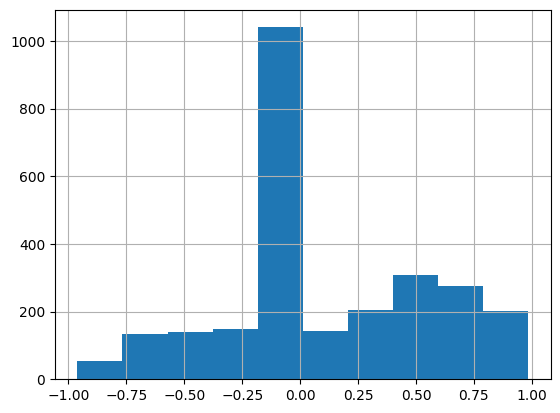

In [15]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Create a new column to store the sentiment scores
netflix['sentiment'] = netflix['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Plot the distribution of sentiment scores
netflix['sentiment'].hist()
plt.show()

In [16]:
positive_tweets = netflix[netflix['sentiment'] > 0]
negative_tweets = netflix[netflix['sentiment'] < 0]
neutral_tweets = netflix[netflix['sentiment'] == 0]

print('Number of positive tweets:', len(positive_tweets))
print('Number of negative tweets:', len(negative_tweets))
print('Number of neutral tweets:', len(neutral_tweets))


Number of positive tweets: 1132
Number of negative tweets: 558
Number of neutral tweets: 959


# **Exploring main location of the tweets**

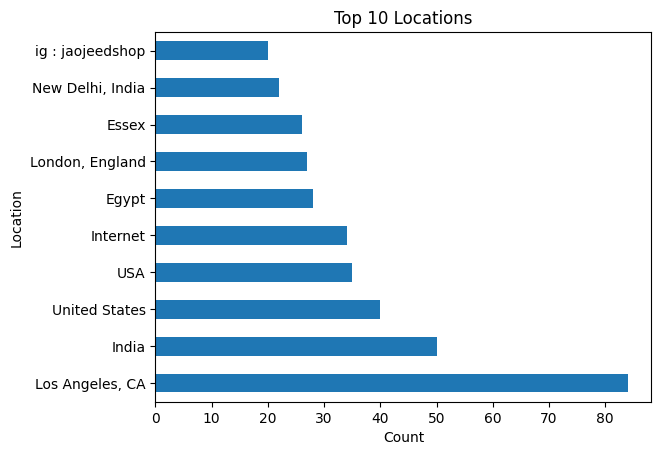

In [17]:
import matplotlib.pyplot as plt

# Get the value counts of the location column
location_counts = netflix['location'].value_counts().head(10)

# Create a horizontal bar plot
location_counts.plot(kind='barh')

# Set the title and labels
plt.title('Top 10 Locations')
plt.xlabel('Count')
plt.ylabel('Location')

# Show the plot
plt.show()


# **Checking main topics being tweeted**

In [18]:
import re

def preprocess_hashtags(hashtags):
    # Remove URLs
    hashtags = re.sub(r'http\S+', '', hashtags)
    # Remove mentions
    hashtags = re.sub(r'@\w+', '', hashtags)
    # Remove hashtags
    hashtags = re.sub(r'#\w+', '', hashtags)
    # Remove special characters and punctuation
    hashtags = re.sub(r'[^\w\s]', '', hashtags)
    # Remove text
    hashtags = re.sub(r'text','',hashtags)
    # Remove indices
    hashtags = re.sub(r'indices','',hashtags)
    # Remove numbers
    hashtags = re.sub(r'\d+', '', hashtags)
    # Convert text to lowercase
    hashtags = hashtags.lower()
    # Remove extra whitespaces
    hashtags = re.sub(r'\s+', ' ', hashtags).strip()
    
    return hashtags


In [19]:
netflix['hashtags'] = netflix['hashtags'].apply(preprocess_hashtags)
netflix

,author_id,statuses_count,location,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,lang,retweet_count,hashtags,favorite_count,tokens,filtered_tokens,sentiment
created_at,,,,,,,,,,,,,,,,,
2023-02-23 23:59:02,727163823648587778,3710,NaN,False,136,267,7,152,1628907318296432640,main titles for amp available on and,en,2,sheetmusic wednesday cello piano sheetmusicplu...,1,"[main, titles, for, amp, available, on, and]","[main, titles, amp, available]",0.0000
2023-02-23 23:57:54,1329551129240346626,438,NaN,False,14,140,0,200,1628907032584626182,shaiya luffy the emperor plans for world chang...,en,0,shaiya pvp world change goddess dark custom se...,0,"[shaiya, luffy, the, emperor, plans, for, worl...","[shaiya, luffy, emperor, plans, world, change,...",0.2960
2023-02-23 23:57:27,2789469546,6682,"Vancouver, British Columbia",False,505,1318,1,7410,1628906917941608448,bang for buck people apple has impressed me wi...,en,0,netflix,0,"[bang, for, buck, people, apple, has, impresse...","[bang, buck, people, apple, impressed, quality...",0.4854
2023-02-23 23:56:16,61900277,22888,Sweden,False,362,2650,6,44157,1628906620099915776,6 episodes done the rest tomorrow am i the onl...,en,0,outerbanks season s obx obx netflix outerbanks,1,"[6, episodes, done, the, rest, tomorrow, am, i...","[6, episodes, done, rest, tomorrow, one, hard,...",-0.5423
2023-02-23 23:55:57,1119447958091644928,3869,NaN,False,167,138,4,52,1628906539649056768,netflixs outer banks season 3 is now streaming,en,0,outerbanks netflix,0,"[netflixs, outer, banks, season, 3, is, now, s...","[netflixs, outer, banks, season, 3, streaming]",0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-02 22:44:40,979420009352105985,7291,Italy,False,88,446,0,54,1631425317632876544,il film bullet train in streaming su amazon pr...,en,0,netflix streaming playblog tecnologia apple pr...,0,"[il, film, bullet, train, in, streaming, su, a...","[il, film, bullet, train, streaming, su, amazo...",0.1779
2023-03-02 22:44:34,1606751894738796550,42,NaN,False,14,335,0,105,1631425292714536964,just finished outer banks 3,en,0,obx outerbanks netflix,0,"[just, finished, outer, banks, 3]","[finished, outer, banks, 3]",0.0000
2023-03-02 22:44:01,1562461403927445504,136,NaN,False,94,538,0,1215,1631425153996406784,knock it off with the bs race card these 2 lia...,en,0,waagh netflix,5,"[knock, it, off, with, the, bs, race, card, th...","[knock, bs, race, card, 2, liars, took, lie, b...",-0.6808


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vect = CountVectorizer()

# Fit the vectorizer to the text data
X = vect.fit_transform(netflix['hashtags'])

# Get the feature names (i.e., the words)
feature_names = vect.get_feature_names_out()

# Sum the word counts for each feature (i.e., word)
word_counts = X.sum(axis=0).A1

# Create a DataFrame with the word counts
word_counts_netflix = pd.DataFrame({'word': feature_names, 'count': word_counts})

# Sort the DataFrame by count in descending order
word_counts_netflix = word_counts_netflix.sort_values('count', ascending=False)

# Display the top 10 most frequent words
print(word_counts_netflix.head(15))

                word  count
2237         netflix   2670
2134          movies    153
2491      outerbanks    111
3244       streaming    108
1433            hulu     94
827       disneyplus     89
2117           movie     89
2181           music     87
2326            news     84
1047            film     81
877   drivetosurvive     78
2686           prime     67
3615              tv     64
1180             fun     64
3187         spotify     62


# **Netflix Prevelence of mentions**

In [21]:
prevelence = 'netflix'

# Count the number of mentions
mentions = netflix['text'].str.count(prevelence).sum()

print(f'{prevelence} was mentioned {mentions} times in these tweets.')

netflix was mentioned 565 times in these tweets.


# **Topic Modelling using NMF**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

no_topics = 10
no_features = 1000

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=1, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(netflix['text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

nmf_model = NMF(n_components=no_topics, random_state=42)
nmf_model.fit(tfidf)


for idx, topic in enumerate(nmf_model.components_):
    print(f"Topic #{idx}")
    print([tfidf_feature_names[i] for i in topic.argsort()[-10:]]) # prints top 10 features in each topic
    print("\n")


Topic #0
['streaming', 'just', '20', 'win', 'participate', 'giveaway', 'premium', 'free', 'account', 'netflix']


Topic #1
['en', 'te', 'recomiendo', 'documentales', 'seaspiracy', 'changers', 'cowspiracy', 'dominion', 'health', 'game']


Topic #2
['cast', 'episode', 'dont', 'drive', 'survive', 'new', 'streaming', 'banks', 'outer', 'season']


Topic #3
['possible', 'website', 'brand', 'url', 'vt', 'ip', 'detected', 'clone', 'address', 'follow']


Topic #4
['working', 'film', 'animated', 'based', 'adaptation', 'project', 'giant', 'guillermo', 'del', 'source']


Topic #5
['ebay', 'belowgrab', 'auction', 'gp', 'sold', 'link', 'baby', '2023', 'day', 'ticket']


Topic #6
['amazing', 'worth', '2022', 'lockwood', 'thank', 'movies', 'today', 'online', 'movie', 'watch']


Topic #7
['episodes', 'got', 'really', 'today', 'finished', 'yall', 'ghost', 'just', 'im', 'watching']


Topic #8
['private', 'th', 'dm', '4k', 'ตฟลกซราคาถก', 'ตฟลก', '30', 'days', 'amp', 'ตฟลกซ']


Topic #9
['just', 'episode',

# **Identifying Micro Influencer**

In [53]:
# filter only verified authors with a high number of statuses count
verified_filtered = netflix[(netflix['verified']) & (netflix['statuses_count'] > 10000)]

In [56]:
# calculate the engagement rate for each tweet
verified_filtered['engagement_rate'] = (verified_filtered['retweet_count'] + verified_filtered['favorite_count']) / verified_filtered['followers_count']

# sort by engagement rate in descending order
sorted_df = verified_filtered.sort_values(by='engagement_rate', ascending=False)

# get the top 5 author ids with the highest engagement rate
top_5_author_ids = sorted_df['author_id'].head(5).tolist()

# select only rows where author_id matches one of the top 5 author ids
author_filtered = sorted_df[sorted_df['author_id'].isin(top_5_author_ids)]

# loop through each author id and print all their tweets
for author_id in top_5_author_ids:
    print("Author ID:", author_id)
    author_tweets = author_filtered[author_filtered['author_id'] == author_id][['text', 'hashtags', 'engagement_rate', 'followers_count', 'sentiment']]
    for index, row in author_tweets.iterrows():
        print("Tweet:", row['text'])
        print("Hashtags:", row['hashtags'])
        print("Engagement Rate:", row['engagement_rate'])
        print("Follower Count:", row['followers_count'])
        print("Sentiment:", row['sentiment'])
        print("---------------")


Author ID: 1606496972
Tweet: he looks good on paper but i look good on you
Hashtags: aggretsuko aggretsukoseason netflix netflixanime
Engagement Rate: 0.03802648007812983
Follower Count: 80891
Sentiment: 0.7003
---------------
Author ID: 2861070519
Tweet: the talented reveals what s would look like if it featured the judgement days amp
Hashtags: netflix wednesday wwe
Engagement Rate: 0.004802938268116966
Follower Count: 7079
Sentiment: 0.7003
---------------
Author ID: 21618697
Tweet: its been awhile how about a sunday afternoon q amp a
Hashtags: cobrakai obliterated netflix nospoilers
Engagement Rate: 0.0034564700799308706
Follower Count: 74064
Sentiment: 0.0
---------------
Author ID: 531558229
Tweet: wow that docuseries really had me in a chokehold for 3 hours straight
Hashtags: murdaughmuders murdaughnetflix netflix
Engagement Rate: 0.0015473488755931503
Follower Count: 9694
Sentiment: 0.6908
---------------
Author ID: 36008477
Tweet: with both amp now hosting adaptations of s work

<ipython-input-56-bb87ca410800>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_filtered['engagement_rate'] = (verified_filtered['retweet_count'] + verified_filtered['favorite_count']) / verified_filtered['followers_count']
